<a href="https://colab.research.google.com/github/handetushar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import *
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
#Display first five row
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Check the size of the dataset
df.shape

(8760, 14)

In [ ]:
#Check if there are some null values 
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Getting more information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# EDA

Text(0.5, 1.0, 'Boxplot')

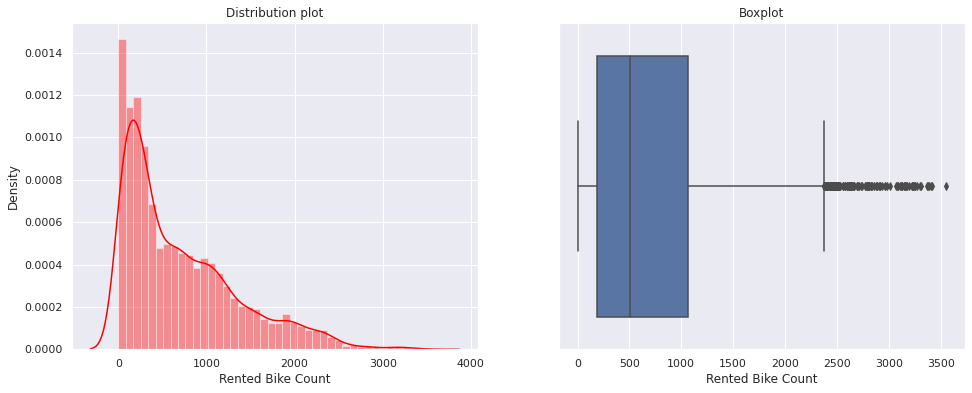

In [ ]:
#Let us look at dependent features
#Densityplot
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(df['Rented Bike Count'], color='red')
plt.title('Distribution plot')
#Boxplot
subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.title('Boxplot')

Dependent feature is skewed right. We need to apply transformation to remove skewness.

Text(0.5, 1.0, 'Distribution plot')

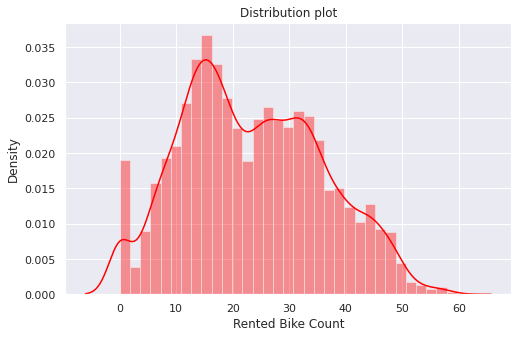

In [ ]:
#Apply transformation
plt.figure(figsize=(8, 5))
sns.distplot(np.sqrt(df['Rented Bike Count']), color='red')
plt.title('Distribution plot')

Text(0.5, 1.0, 'kde plot')

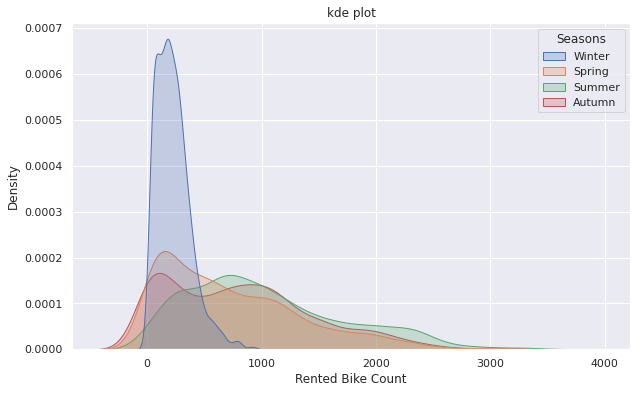

In [ ]:
#kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Rented Bike Count', hue='Seasons', fill='True')
plt.title('kde plot')

Text(0.5, 1.0, 'Counts per Hour')

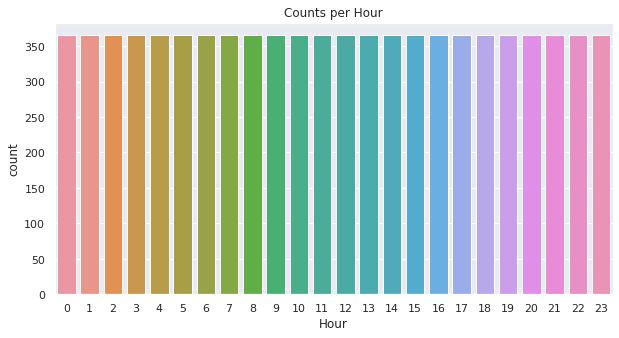

In [ ]:
#Countplot for hours
plt.figure(figsize=(10, 5))
sns.countplot(df['Hour'])
plt.title('Counts per Hour')

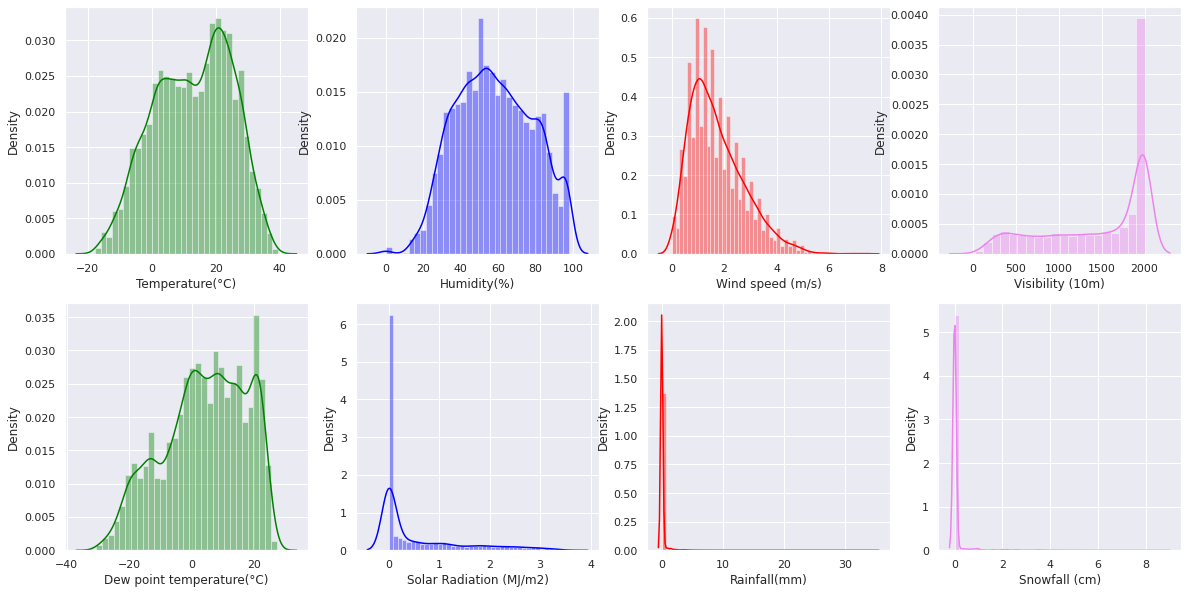

In [ ]:
# display distribution of the independent features
sns.set(rc={"figure.figsize": (20, 10)})
subplot(2,4,1)
sns.distplot(df['Temperature(°C)'], color='green' )
subplot(2,4,2)
sns.distplot(df['Humidity(%)'], color='blue')
subplot(2,4,3)
sns.distplot(df['Wind speed (m/s)'], color='red')
subplot(2,4,4)
sns.distplot(df['Visibility (10m)'], color='violet')
subplot(2,4,5)
sns.distplot(df['Dew point temperature(°C)'], color='green' )
subplot(2,4,6)
sns.distplot(df['Solar Radiation (MJ/m2)'], color='blue')
subplot(2,4,7)
sns.distplot(df['Rainfall(mm)'], color='red')
subplot(2,4,8)
sns.distplot(df['Snowfall (cm)'], color='violet')

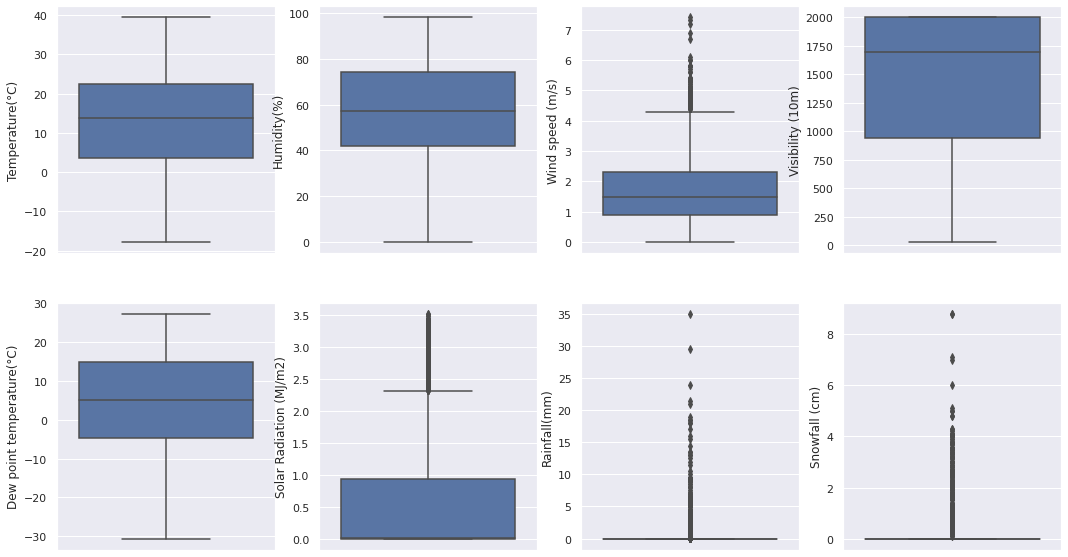

In [ ]:
#Plotting boxplot for each independent variables
sns.set(rc={"figure.figsize": (18, 10)})
subplot(2,4,1)
sns.boxplot(y=df['Temperature(°C)'])
subplot(2,4,2)
sns.boxplot(y=df['Humidity(%)'])
subplot(2,4,3)
sns.boxplot(y=df['Wind speed (m/s)'])
subplot(2,4,4)
sns.boxplot(y=df['Visibility (10m)'])
subplot(2,4,5)
sns.boxplot(y=df['Dew point temperature(°C)'] )
subplot(2,4,6)
sns.boxplot(y=df['Solar Radiation (MJ/m2)'])
subplot(2,4,7)
sns.boxplot(y=df['Rainfall(mm)'])
subplot(2,4,8)
sns.boxplot(y=df['Snowfall (cm)'])

Windspeed, Rainfall and Snowfall has maximum amount of outliers.

#Barplots
Using barpot we can plot two more attributes together and compare them.

In [ ]:
# Convert date into day, month and year.
import datetime
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

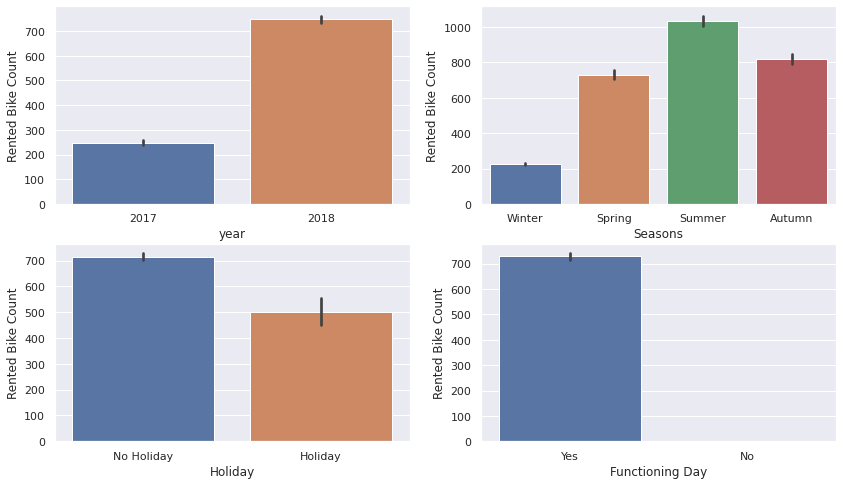

In [ ]:
#Plotting bar
sns.set(rc={"figure.figsize": (14, 8)})
subplot(2,2,1)
sns.barplot(df['year'], y=df['Rented Bike Count'])
subplot(2,2,2)
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])
subplot(2,2,3)
sns.barplot(x=df['Holiday'],y=df['Rented Bike Count'])
subplot(2,2,4)
sns.barplot(x=df['Functioning Day'],y=df['Rented Bike Count'])

#Scatterplot
Draw the scatterplot dependent and independent features and draw the bestfit line.

In [ ]:
#List the columns with numerical values
numeric_features=[]
for i in df.columns:
  if df[i].dtype!='O':
    numeric_features.append(i)

numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year',
 'month',
 'day']

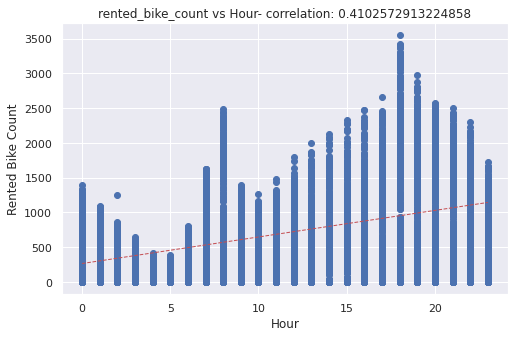

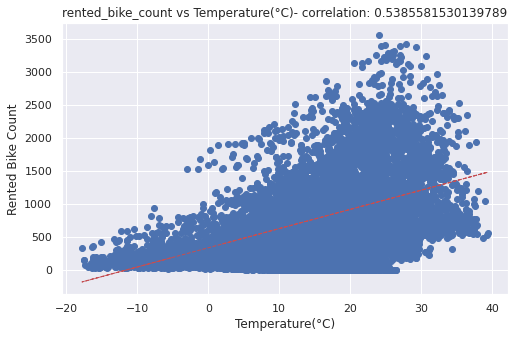

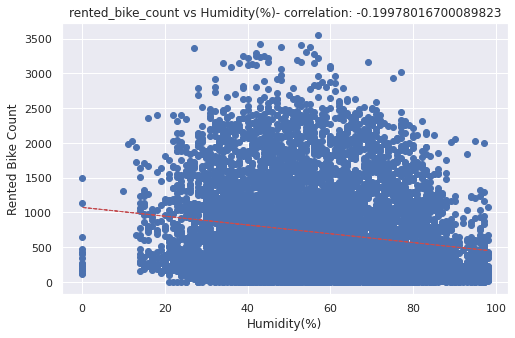

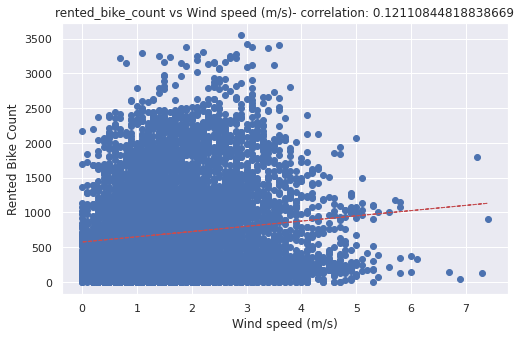

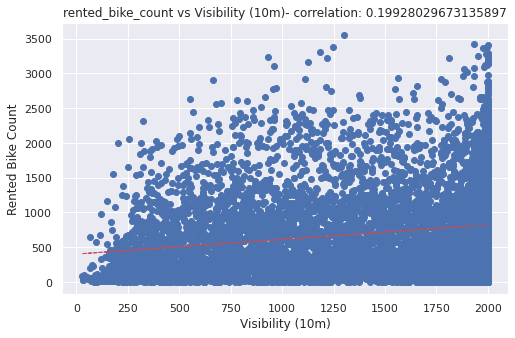

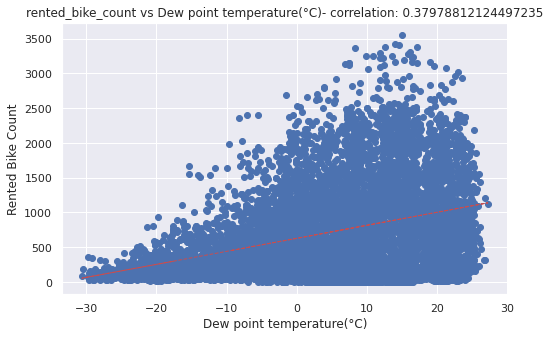

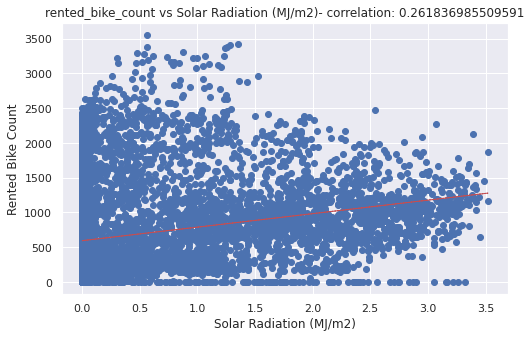

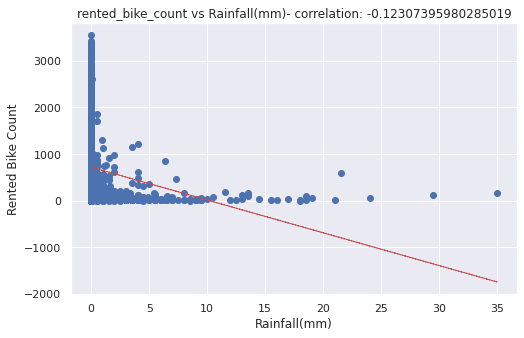

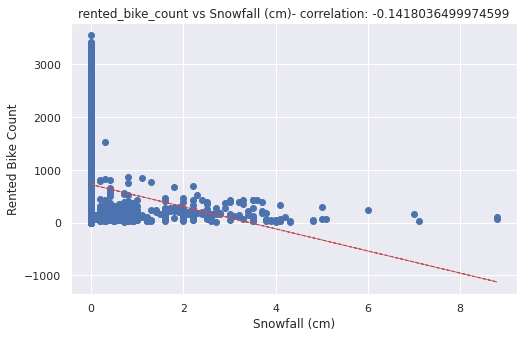

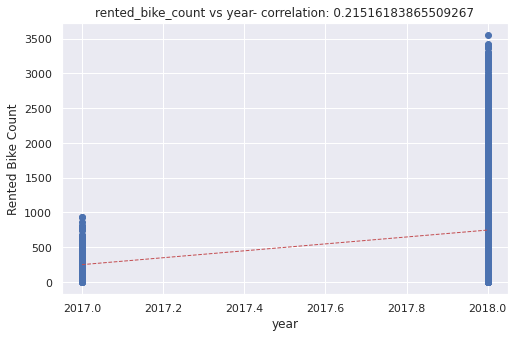

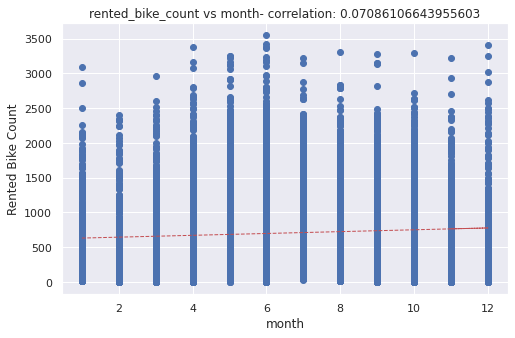

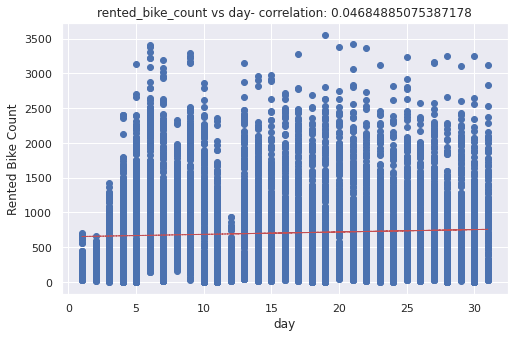

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#Heatmap
Heatmap can be use to identify multicollinearity between independent feature. It can also use to identify correlation between dependent and independent feature. 

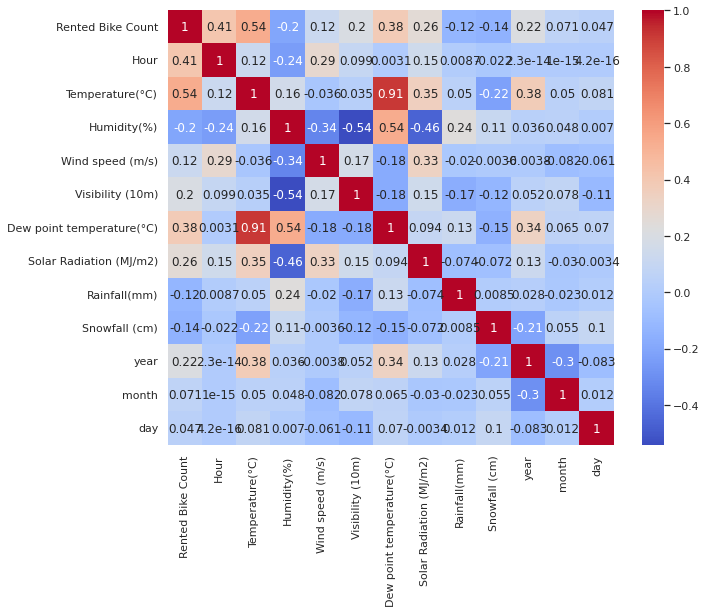

In [ ]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Features are highly positively correlated with independent variables are Hours, Temprature, Dew point temprature. Features are negatively correlated with independent features are Humidity, Rainfall, Snowfall.Dew point temp is highly correlated with temperature.

#Multicollinearity
Multicollinearity can also be found by Variance inflation factor (VIF)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year', 'month', 'day']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


Temprature and dew point temparature having high VIF lets drop dew point temperature, since both are linearly correlated with each other.

In [ ]:
df=df.drop('Dew point temperature(°C)', axis=1)

In [ ]:
#again calculate VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year', 'month', 'day']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


## Handeling the outliers
Outliers can mislead the training process which results less accurate models and bad results.

In [ ]:
#Collect all numericall features
numeric_features=df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month', 'day'],
      dtype='object')

Drop the independent variable, hour, day, month and year from this list, since they dont have the outliers.

In [ ]:
to_remove=['Rented Bike Count', 'Hour','year', 'month', 'day']
numeric_features=list(set(numeric_features)-set(to_remove))

In [ ]:
#Removing the outliers
for i in numeric_features:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  df = df[df[i] <= (Q3+(1.5*IQR))]
  df = df[df[i] >= (Q1-(1.5*IQR))]

print(f'Initially there was 8760 value after removing outliers {df.shape[0]} values remains. ')

Initially there was 8760 value after removing outliers 7184 values remains. 


#Handaling catagorical features
We will convert categorical values into numerical values. For that we can use OneHot encoding or mapping to binary values.

In [ ]:
#OneHot encoding
seasons_df=pd.get_dummies(df['Seasons'], prefix='seas', prefix_sep='_', drop_first='True')
holiday_df=pd.get_dummies(df['Holiday'], drop_first='True')
funday_df=pd.get_dummies(df['Functioning Day'], prefix='fun_day', drop_first='True')

In [ ]:
new_df=pd.concat([df,seasons_df, holiday_df, funday_df], axis=1)

In [ ]:
#drop categorical features now
new_df.drop(['Date', 'Seasons', 'Holiday','Functioning Day'],axis=1, inplace=True)

In [ ]:
#Check the columns of the new dataframe.
new_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month', 'day', 'seas_Spring',
       'seas_Summer', 'seas_Winter', 'No Holiday', 'fun_day_Yes'],
      dtype='object')

In [ ]:
# Rename the columns in the proper format
new_df=new_df.rename(columns={'Rented Bike Count':'bike_count','Hour':'hours','Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                              'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility','Solar Radiation (MJ/m2)':'solar_rad', 'Rainfall(mm)':'rainfall',
                              'Snowfall (cm)':'snowfall','No Holiday':'working_day','fun_day_Yes':'functioning_day' })

In [ ]:
#Display first five rows
new_df.head()

,bike_count,hours,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,year,month,day,seas_Spring,seas_Summer,seas_Winter,working_day,functioning_day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1


In [ ]:
#Checking the shape of the dataset
new_df.shape

(7184, 17)

In [ ]:
#Seperating independent and dependent values
X=new_df.drop('bike_count', axis=1)
#y=new_df['bike_count']
y=np.sqrt(new_df['bike_count'])

#Modeling

In [ ]:
#Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
#Seperating independent and dependent values
X=new_df.drop('bike_count', axis=1)
# Dependent feature was right skewed apply root transfomation to make it normal
y=np.sqrt(new_df['bike_count'])

In [ ]:
#train_test_split
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# Check size of train and test set
print(X_train.shape, X_test.shape )

(5747, 16) (1437, 16)


In [ ]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.9069888 ,  0.36165043, -1.57321655, ..., -0.55919573,
         0.22926863,  0.18939055],
       [-0.34426965, -0.03750552, -1.51962338, ..., -0.55919573,
         0.22926863,  0.18939055],
       [-1.5955281 ,  1.00377087,  0.30254451, ..., -0.55919573,
         0.22926863,  0.18939055],
       ...,
       [-1.5955281 , -0.88788124, -0.93009847, ...,  1.78828262,
         0.22926863,  0.18939055],
       [ 0.9069888 , -0.28047001,  1.16003528, ..., -0.55919573,
         0.22926863,  0.18939055],
       [-1.17844195,  0.11868594,  0.24895134, ..., -0.55919573,
         0.22926863,  0.18939055]])

In [ ]:
#Converting nd array to Dataframe
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.head()

,hours,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,year,month,day,seas_Spring,seas_Summer,seas_Winter,working_day,functioning_day
0,0.906989,0.361650,-1.573217,1.559037,0.897412,0.635790,0.0,0.0,0.285452,-0.751981,0.051228,1.750530,-0.573399,-0.559196,0.229269,0.189391
1,-0.344270,-0.037506,-1.519623,-0.140870,-0.162790,1.526836,0.0,0.0,0.285452,-0.751981,0.393426,1.750530,-0.573399,-0.559196,0.229269,0.189391
2,-1.595528,1.003771,0.302545,-0.884579,-1.248642,-0.649653,0.0,0.0,0.285452,-0.459227,0.051228,1.750530,-0.573399,-0.559196,0.229269,0.189391
3,1.324075,0.812870,0.784883,-0.672091,0.531471,-0.649653,0.0,0.0,0.285452,-0.166473,-0.176905,-0.571255,1.743987,-0.559196,0.229269,0.189391
4,1.602132,0.005881,-0.340574,0.071618,-0.470591,-0.649653,0.0,0.0,0.285452,-0.751981,0.393426,1.750530,-0.573399,-0.559196,0.229269,0.189391


#Linear Regression

Linear Regression is used to perform regression task. It makes predictions for continuous/real or numeric variables. Since we converted all varibales into numeric values,lets try linear regression for prediction.

In [ ]:
#Importing the model
from sklearn.linear_model import LinearRegression

#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting train and test
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [ ]:
#Check the value of the intercept
regressor.intercept_

24.502137409682934

In [ ]:
#Check the coeffiecients of variables
regressor.coef_

array([ 3.96373857e+00,  5.46601578e+00, -2.06679091e+00,  3.21465546e-01,
       -8.32439773e-02, -1.95488335e-01,  9.57567359e-16,  1.33226763e-15,
       -6.00887688e-01,  1.89969615e-02, -2.35510802e-01, -1.37311762e+00,
       -1.11344390e+00, -3.91862985e+00,  6.60567088e-01,  5.45547127e+00])

In [ ]:
#Calculate the evaluation metrices
MSE_linear=mean_squared_error(y_test, y_pred)
print('Mean squared error is:', MSE_linear)

RMSE_linear=math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared erroris :', RMSE_linear)

r2_score_train=r2_score(y_train, y_pred_train)
print('r2 score for train set is', r2_score_train)

r2_linear=r2_score(y_test, y_pred)
print(f'r2 score for test set is',r2_linear )

Mean squared error is: 51.105145864508025
Root mean squared erroris : 7.148786321083323
r2 score for train set is 0.6687386136912157
r2 score for test set is 0.685677636098895


In [ ]:
# Compare actual values with predicted values
test_df = pd.DataFrame(y_test)
test_df['Predicted count']=y_pred
test_df.rename(columns = {'bike_count':'Actual Count'},inplace = True)
test_df.head()

,Actual Count,Predicted count
2125,18.303005,18.886761
2325,20.273135,29.316282
5655,27.110883,40.260149
7370,0.000000,-7.308956
1152,14.662878,7.050445


#Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -50.55670728012205


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE_ridge  = mean_squared_error((y_test), (y_pred_ridge))
print("Mean squared error is :" , MSE_ridge)

RMSE = np.sqrt(MSE_ridge)
print("Root mean squared error is :" ,RMSE)

r2_ridge = r2_score((y_test), (y_pred_ridge))
print("R2 score is :" ,r2_ridge)

Mean squared error is : 51.10915113395162
Root mean squared error is : 7.149066451918853
R2 score is : 0.6856530016763085


In [ ]:
test_df['Predicted count']=y_pred_ridge
test_df.rename(columns = {'bike_count':'Actual Count'},inplace = True)
test_df.head()

,Actual Count,Predicted count
2125,18.303005,18.885097
2325,20.273135,29.319746
5655,27.110883,40.250150
7370,0.000000,-7.284485
1152,14.662878,7.054236


#ElasticNet


In [ ]:
#Importing the model
from sklearn.linear_model import ElasticNet

#Preparing the model
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


In [ ]:
#Fitting the values
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
#Predicting the values
y_pred_train_elastic=elastic_regressor.predict(X_train)
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
#Check the best parameters
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -50.35699831052931


In [ ]:
# Calculating the evaluation metrics
MSE_elasticnet = mean_squared_error(y_test, y_pred_elastic)
print("Mean sqaured error for test set is :" , MSE_elasticnet)

RMSE_elasticnet = np.sqrt(MSE_elasticnet)
print("Root mean squared for test set is :" ,RMSE_elasticnet)

r2_train=r2_score(y_train, y_pred_train_elastic)
print('R2 score for train set is', r2_train)

r2_elasticnet = r2_score(y_test, y_pred_elastic)
print("R2 score for test set is :" ,r2_elasticnet)

Mean sqaured error for test set is : 51.14116173604585
Root mean squared for test set is : 7.151304897432765
R2 score for train set is 0.6686950295959526
R2 score for test set is : 0.6854561203652398


In [ ]:
#Comapre actual values with predicted values
test_df['Predicted count']=y_pred_elastic
test_df.head()

,Actual Count,Predicted count
2125,18.303005,18.893815
2325,20.273135,29.350447
5655,27.110883,40.206571
7370,0.000000,-7.199396
1152,14.662878,7.061144


Text(0.5, 1.0, 'Comparision of actual and predicted values')

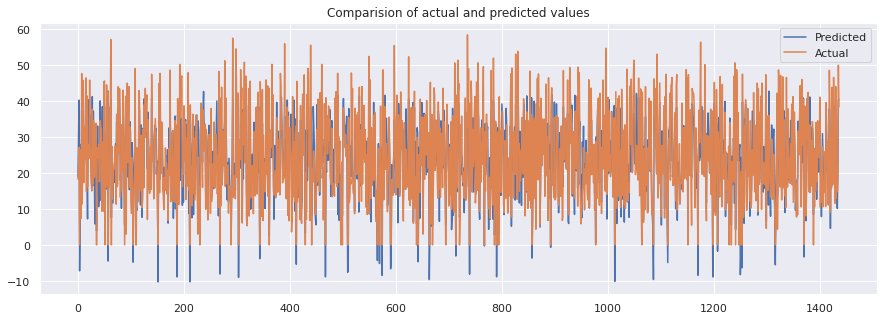

In [ ]:
#Plotting actual and predicted values
plt.figure(figsize=(15,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

#RandomForestRegressor

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Preparing the model
classifier = RandomForestRegressor(n_estimators=20, random_state=1) 


In [ ]:
# Fit the object to train dataset
classifier.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

In [ ]:
#Predicting values
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
#Calculating metrices
MSE_random=mean_squared_error(y_test, test_preds)
RMSE_random=np.sqrt(mean_squared_error(y_test, test_preds))
r2_score_train=r2_score(y_train, train_preds)
r2_randomforest=r2_score(y_test, test_preds)

print('Mean Squared Error:',MSE_random )
print('Root Mean Squared Error:',RMSE_random )
print('r2 score for train set is:', r2_score_train)
print('r2 score for test set is:', r2_randomforest )

Mean Squared Error: 15.50301673093797
Root Mean Squared Error: 3.9373870435782625
r2 score for train set is: 0.9837744754073773
r2 score for test set is: 0.9046486457667855


In [ ]:
# Compare actual values with predicted values
test_df['Predicted count']=test_preds
test_df.head()

,Actual Count,Predicted count
2125,18.303005,18.894952
2325,20.273135,23.888988
5655,27.110883,27.585251
7370,0.000000,0.000000
1152,14.662878,14.238608


Text(0.5, 1.0, 'Comparision of actual and predicted values')

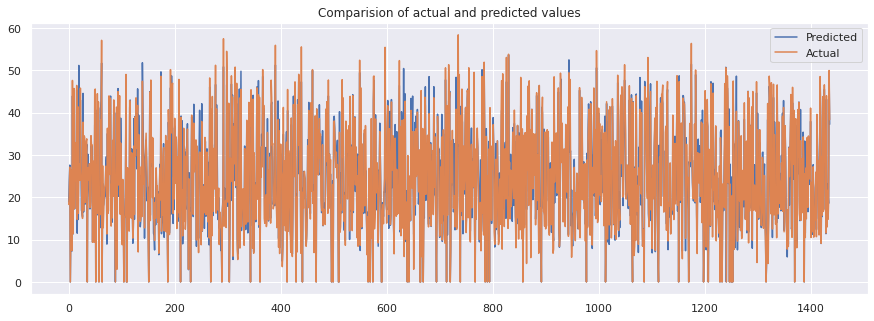

In [ ]:
#Plotting actual and predicted value
plt.figure(figsize=(15,5))
plt.plot(test_preds)
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

In [ ]:
features = X_train_df.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

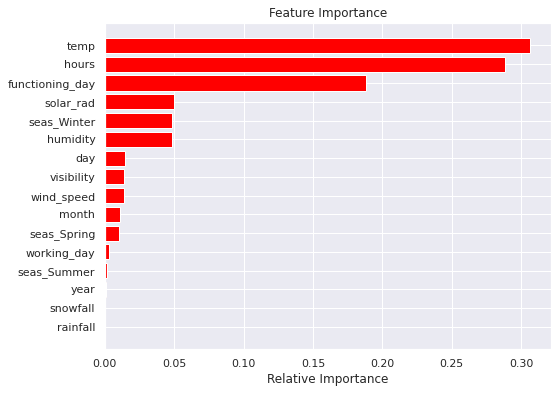

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#Xgboost

In [ ]:
#Prepairing the model
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(objective ='reg:linear',
                  n_estimators=70, max_depth=10, eta=0.08,subsample=0.8, reg_lambda=1.2)

#fitting the model
xgb_reg.fit(X_train, y_train)

[12:24:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.08, max_depth=10, n_estimators=70, reg_lambda=1.2,
             subsample=0.8)

In [ ]:
#Predicting train score
xgb_train_score= xgb_reg.score(X_train, y_train)

In [ ]:
#Predicting the test data.
y_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
MSE_xgb  = mean_squared_error((y_test), (y_pred_xgb))
RMSE_xgb = np.sqrt(MSE_xgb)
r2_score_xgb = r2_score((y_test), (y_pred_xgb))

print("Mean Squared Error:" , MSE_xgb)
print("Root Mean Squared Error:" ,RMSE_xgb)
print(f'r2 score for train set is', xgb_train_score)
print("r2 score for test set is" ,r2_score_xgb)

Mean Squared Error: 13.24409757872407
Root Mean Squared Error: 3.6392440944135735
r2 score for train set is 0.9914996250867699
r2 score for test set is 0.9185421352730636


In [ ]:
# Compare actual values with predicted values
test_df['Predicted count']=y_pred_xgb
test_df.head()

,Actual Count,Predicted count
2125,18.303005,18.666592
2325,20.273135,24.545883
5655,27.110883,27.478252
7370,0.000000,0.145483
1152,14.662878,14.659338


Text(0.5, 1.0, 'Comparision of actual and predicted values')

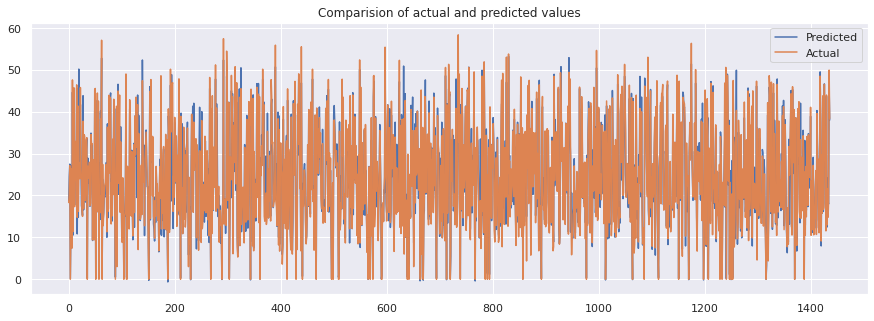

In [ ]:
#Plotting actual and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_pred_xgb)
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

In [ ]:
# Plotting important features
importances = xgb_reg.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

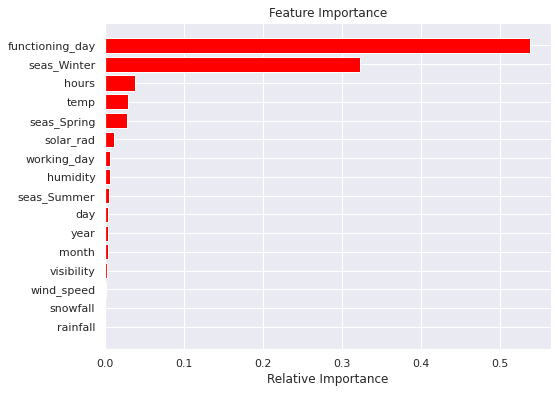

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Top most imporatant fatures are winter season followed by functioning day and hours.

## Comparing r2 scores of all models together
Comparing r2 scores of all models together so we can compare performence of each model.

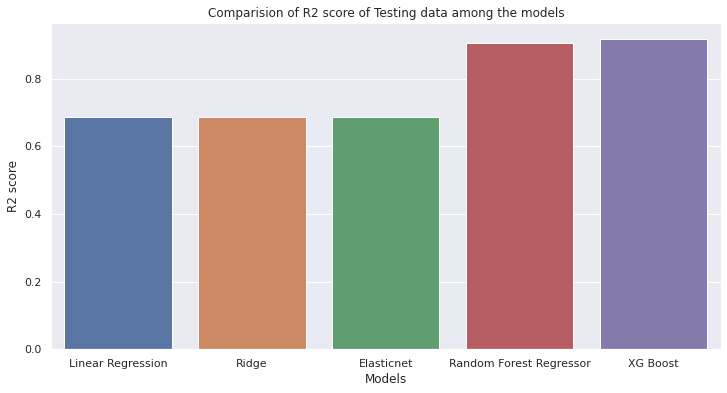

In [ ]:
#Plotting the r2 score
models = ['Linear Regression','Ridge','Elasticnet' ,'Random Forest Regressor','XG Boost']
r2_scores= [r2_linear, r2_ridge, r2_elasticnet, r2_randomforest, r2_score_xgb]
plt.figure(figsize=(12,6))

plt.ylabel("R2 score")
plt.xlabel("Models")
sns.barplot(x= models, y=r2_scores)
plt.title('Comparision of R2 score of Testing data among the models')
plt.show()

#Conclusion